In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

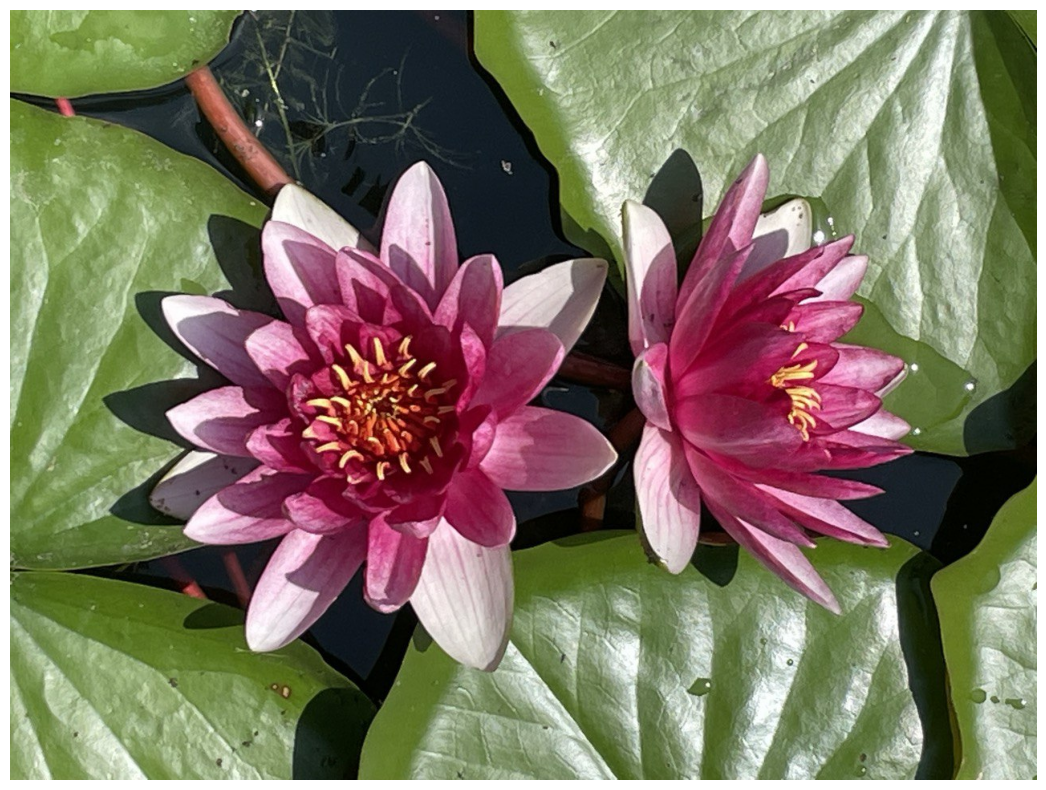

In [66]:
# Load image
img = cv2.imread('503.jpg')

# Convert it to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot it
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [67]:

from sklearn.cluster import KMeans
import numpy as np
import cv2

def dominant_colors(image_path, num_colors=4):
    img = cv2.imread('503.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixels = img.reshape(-1, 3)
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    cluster_centers = kmeans.cluster_centers_.astype(int)
    return cluster_centers
image_path = '503.jpg'
dominant_colors = dominant_colors(image_path)
print("Dominant colors:", dominant_colors)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dominant colors: [[216 206 201]
 [111  91  64]
 [ 37  29  26]
 [149 152 120]]


In [68]:
colors = np.array([[216, 206, 201],
                   [ 111,  91,  64],
                   [37,  29,  26],
                   [149, 152, 120]])

In [69]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.linalg.norm(colors - pixel, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]

        # Apply quantization
        quantized[r, c, :] = new_pixel


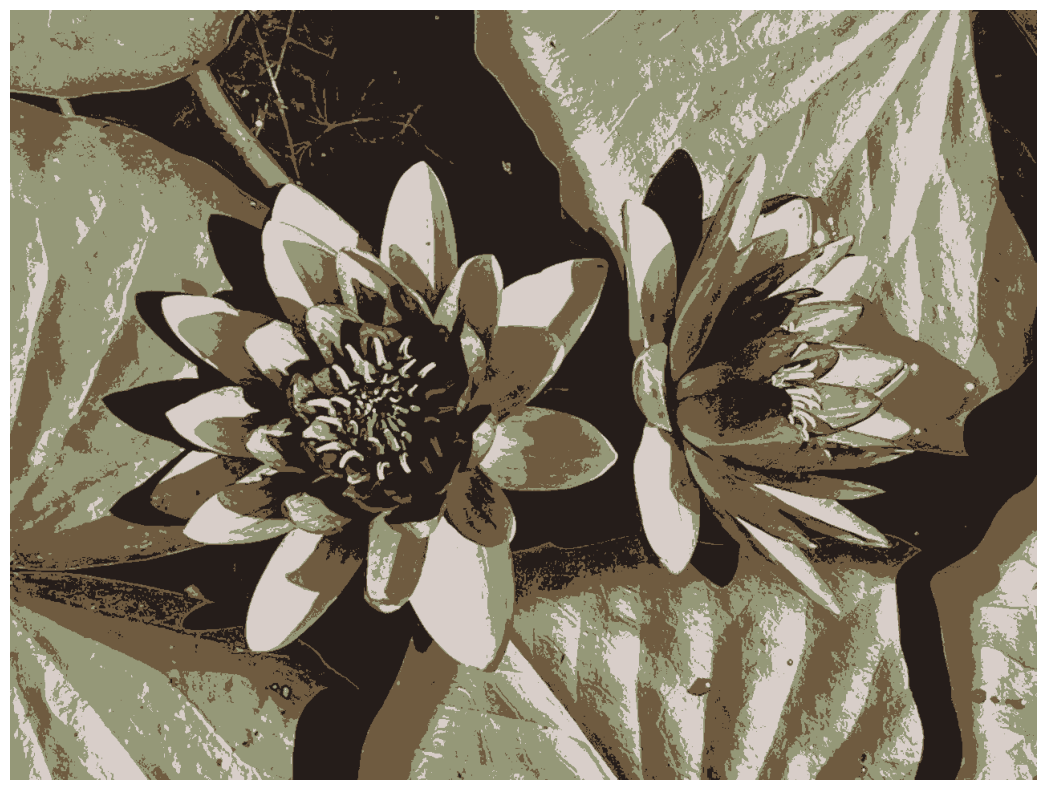

In [70]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))
plt.axis('off')
plt.show()


In [71]:
# Compute average quantization error
avg_quant_error = np.mean(np.abs(img - quantized))


In [72]:
def closest_color(pixel, palette):
    min_dist = float('inf')
    closest = None
    for color in palette:
        dist = np.linalg.norm(pixel - color)
        if dist < min_dist:
            min_dist = dist
            closest = color
    return closest



In [73]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows - 1):
    for c in range(1, cols - 1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]

        # Find the closest color from the palette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = closest_color(pixel, colors)

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c + 1, :] += quant_error * 7 / 16
        img_tmp[r + 1, c - 1, :] += quant_error * 3 / 16
        img_tmp[r + 1, c, :] += quant_error * 5 / 16
        img_tmp[r + 1, c + 1, :] += quant_error * 1 / 16

        # Apply dithering
        dithering[r, c, :] = new_pixel


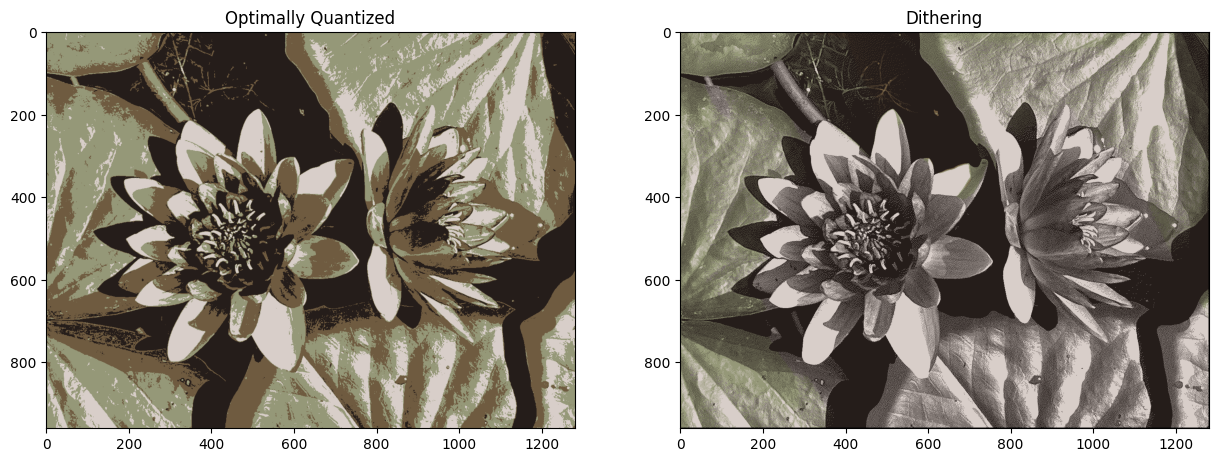

In [74]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))
plt.title('Optimally Quantized')
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))
plt.title('Dithering')
plt.show()


In [75]:
# Compute average quantization error for dithered image
avg_dith_error = np.mean(np.square(img - dithering))
print("Average Quantization Error (Dithering):", avg_dith_error)


Average Quantization Error (Dithering): 4109.536


Изображение с более высокой ошибкой квантования определяет оптимальное квантование. Сглаживание — это метод распределения ошибки квантования по соседним пикселям с уменьшением визуального влияние ошибок квантования. Изображение после оптимального квантования без сглаживания будет иметь более высокую ошибку квантования (по сравнению с изображением со сглаживанием).


Изображение после дизеринга будет визуально лучше. Дизеринг смягчает эффекты квантования распределяя ошибку квантования на соседние пиксели.

the same process using only two colours: black and white

In [76]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])



In [77]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.linalg.norm(colors - pixel, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]

        # Apply quantization
        quantized[r, c, :] = new_pixel


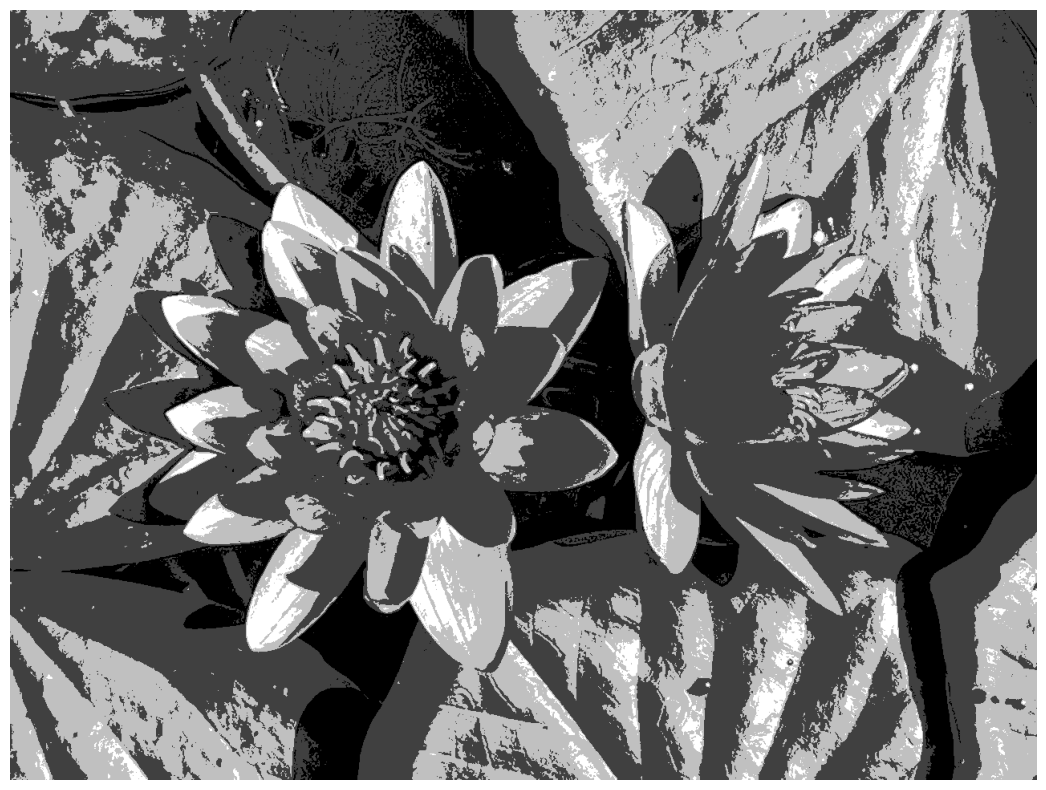

In [78]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))
plt.axis('off')
plt.show()

In [79]:
# Compute average quantization error
avg_quant_error = np.mean(np.abs(img - quantized))

In [80]:
def closest_color(pixel, palette):
    min_dist = float('inf')
    closest = None
    for color in palette:
        dist = np.linalg.norm(pixel - color)
        if dist < min_dist:
            min_dist = dist
            closest = color
    return closest

In [81]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows - 1):
    for c in range(1, cols - 1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]

        # Find the closest color from the palette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = closest_color(pixel, colors)

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c + 1, :] += quant_error * 7 / 16
        img_tmp[r + 1, c - 1, :] += quant_error * 3 / 16
        img_tmp[r + 1, c, :] += quant_error * 5 / 16
        img_tmp[r + 1, c + 1, :] += quant_error * 1 / 16

        # Apply dithering
        dithering[r, c, :] = new_pixel

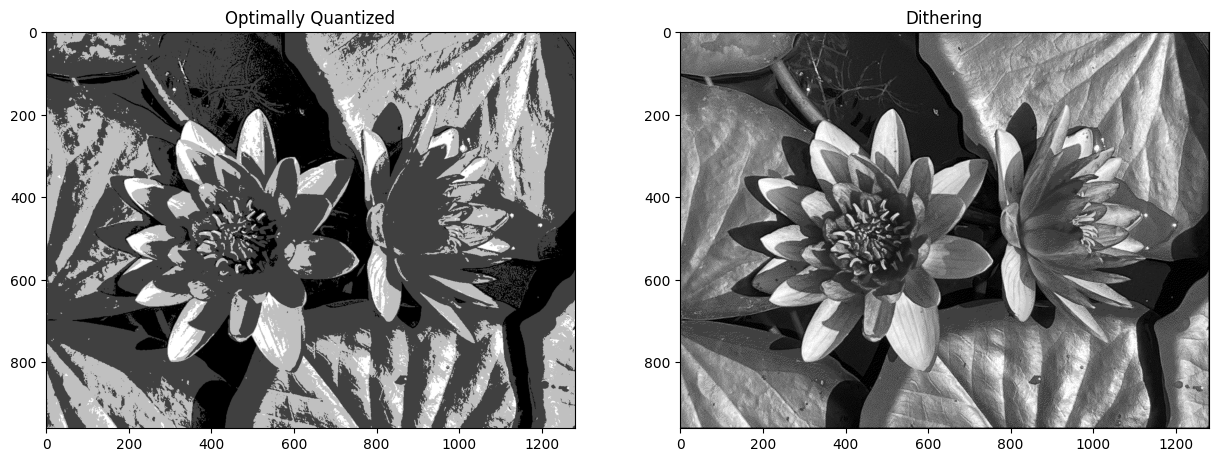

In [82]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))
plt.title('Optimally Quantized')
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))
plt.title('Dithering')
plt.show()